In [89]:
# load useful packages
import pandas as pd
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
%matplotlib inline
# import seaborn as sns
import statsmodels.api as sm
# add seaborn viz
# sns.set()

import plotly

import plotly.graph_objects as go

## Find same ETH1 Deposit Addresses for multiple validators

In [2]:
df_eth1_deposits = pd.read_csv('validator_deposits.csv')
df_eth1_deposits.head()

,id,validatorindex,amount,block_number,block_ts,from_address,merkletree_index,publickey,removed,signature,tx_hash,tx_input,withdrawal_credentials,tx_index,valid_signature
0,1,0,32000000000,3092261,1595440261,0x388ea662ef2c223ec0b047d41bf3c0f362142ad5,0x0200000000000000,0x8fcf28896a85e5e76ee9e508438e23e7253da1a23a65...,NaN,0x9800d7c29908ddd1754490577753e65bd27484ca456b...,0xdaf29ed67bf1d7ccc92e1a4f8fdfe5779c84a7d2612f...,0x22895118000000000000000000000000000000000000...,0x0010361af430aa7ab4a9567eaaca50ec5e02315ca151...,1,1
1,2,1,32000000000,3096914,1595510084,0x11c100b0173d8cd7e73f6e1808e5a811fc5a93e7,0x0400000000000000,0x873e73ee8b3e4fcf1d2fb0f1036ba996ac9910b5b348...,NaN,0xa6aef7016df5e73c2c142e3f7a0a0a4c85283a6e8fa3...,0xf5110f464bd54b5b37969b295131970115563cc06bc0...,0x22895118000000000000000000000000000000000000...,0x00b8cdcf79ba7e74300a07e9d8f8121dd0d8dd11dcfd...,0,1
2,3,1,32000000000,3097251,1595515139,0x11c100b0173d8cd7e73f6e1808e5a811fc5a93e7,0x0600000000000000,0x873e73ee8b3e4fcf1d2fb0f1036ba996ac9910b5b348...,NaN,0xa6aef7016df5e73c2c142e3f7a0a0a4c85283a6e8fa3...,0x20d80c684652b51913cf4538e25b5bbeaa83cbf9ade0...,0x22895118000000000000000000000000000000000000...,0x00b8cdcf79ba7e74300a07e9d8f8121dd0d8dd11dcfd...,0,1
3,4,1,32000000000,3411069,1600234691,0x11c100b0173d8cd7e73f6e1808e5a811fc5a93e7,0x900b010000000000,0x873e73ee8b3e4fcf1d2fb0f1036ba996ac9910b5b348...,NaN,0xa6aef7016df5e73c2c142e3f7a0a0a4c85283a6e8fa3...,0x3abaa9b92d4ca71296c2ec4fbde6ed1bcd5daffb8ef4...,0x22895118000000000000000000000000000000000000...,0x00b8cdcf79ba7e74300a07e9d8f8121dd0d8dd11dcfd...,0,1
4,5,2,32000000000,3097139,1595513459,0x162fa0abecf596e07fb8ef128c15cd589f7b473a,0x0500000000000000,0x8c2f535d3bec65f95cb4ba455566e4ec3de8da5c13a6...,NaN,0x8ac5120c07c2202fbc31ae2e5dc9e737cfa4056344f9...,0x0c025ec458bbe33e625e33b45f9608d6671220175013...,0x22895118000000000000000000000000000000000000...,0x006490500934b8b1876401dc09b7904d04c0897a9a28...,0,1


In [4]:
df_eth1_deposits_subset = df_eth1_deposits[['validatorindex', 'from_address']]
df_eth1_deposits_subset.head()

,validatorindex,from_address
0,0,0x388ea662ef2c223ec0b047d41bf3c0f362142ad5
1,1,0x11c100b0173d8cd7e73f6e1808e5a811fc5a93e7
2,1,0x11c100b0173d8cd7e73f6e1808e5a811fc5a93e7
3,1,0x11c100b0173d8cd7e73f6e1808e5a811fc5a93e7
4,2,0x162fa0abecf596e07fb8ef128c15cd589f7b473a


In [11]:
#Find ETH1 Deposit addresses that were involved in deposits into multiple validators (over 100)

multiple_validators_same_deposit_addr = df_eth1_deposits_subset.groupby('from_address')['validatorindex'].nunique().sort_values(ascending=False)
over_100_validators_same_deposit_addr = multiple_validators_same_deposit_addr[multiple_validators_same_deposit_addr>100]
over_100_validators_same_deposit_addr

from_address
0xa9ae9208961dae2363260648612c5349fe67167b    6000
0x326fc88d9e4fcdf2a5b938348137eaf01a27b89d    3758
0x508230b5323929b5dd974ae799386fe602d3f76f    3624
0xe91cbddb3de397ff3152c45c55a861874b7ae843    3554
0x388ea662ef2c223ec0b047d41bf3c0f362142ad5    2376
                                              ... 
0x9b49e8a93b241a96a29bee871a373146b22fa59f     107
0xcaedbe99968a1fe31573b82e5060802f12a8ce14     105
0x11c100b0173d8cd7e73f6e1808e5a811fc5a93e7     104
0xa514fe451d039788f3d45e91b5314cdd3ee25023     103
0xea5d806c8f2c31c3c9c2ef5031ca4c6af4c637fe     101
Name: validatorindex, Length: 83, dtype: int64

In [12]:
eth1_groupings = df_eth1_deposits_subset[df_eth1_deposits_subset['from_address'].isin(over_100_validators_same_deposit_addr.index)].sort_values(by=['from_address'])
eth1_groupings.head()

,validatorindex,from_address
1824,1822,0x03609041aaaa3ec1c2dd908e2c9f6abc0ac01a53
1913,1911,0x03609041aaaa3ec1c2dd908e2c9f6abc0ac01a53
1912,1910,0x03609041aaaa3ec1c2dd908e2c9f6abc0ac01a53
1911,1909,0x03609041aaaa3ec1c2dd908e2c9f6abc0ac01a53
1910,1908,0x03609041aaaa3ec1c2dd908e2c9f6abc0ac01a53


In [15]:
eth1_groupings = eth1_groupings.drop_duplicates()

# To merge into master validators by identifier list offline (Excel)
eth1_groupings.to_csv('eth1_deposit_address_groupings.csv')

In [17]:
df_eth1_deposits[df_eth1_deposits['from_address']=='0xa9ae9208961dae2363260648612c5349fe67167b']

,id,validatorindex,amount,block_number,block_ts,from_address,merkletree_index,publickey,removed,signature,tx_hash,tx_input,withdrawal_credentials,tx_index,valid_signature
6755,6756,6691,32000000000,3125272,1595935511,0xa9ae9208961dae2363260648612c5349fe67167b,0xbf1a000000000000,0xac58e14ab3e76374cf50d29e72ad36b85c269db23542...,NaN,0xb368c422fdea5f0b29fc67e0ee833fb6ec4f9005eb32...,0x017e1932e8c782e5ea68f791147b5cd5e751f846af1e...,0x22895118000000000000000000000000000000000000...,0x00c651f0785f0aafb81687f99a549eca96708b009073...,0,1
6770,6771,6706,32000000000,3125755,1595942756,0xa9ae9208961dae2363260648612c5349fe67167b,0xce1a000000000000,0xaabb5cb850a59917d7230e10013f590d54f2166a57f5...,NaN,0xaefcf924b0db4b6cd1578dcc7e62babd1e105b8d9655...,0x13cd8c2ec2faff6ee4c4d596652f0d26b14f750be53d...,0x22895118000000000000000000000000000000000000...,0x00e99315f7fcfc7490cd0cab6ef1c44b90107b552cb3...,0,1
6771,6772,6707,32000000000,3125756,1595942771,0xa9ae9208961dae2363260648612c5349fe67167b,0xcf1a000000000000,0x91c63ad7803d7fa2c24961f73d2b243fff396ff9d4b9...,NaN,0x851f059213bddd20181d5102c74353f9bbe53af07525...,0x2a62097db14813b59b2a6c36eb0adce9839d1bac1300...,0x22895118000000000000000000000000000000000000...,0x00f152524c30e2410409646b7f4bbc5e5a03d28ec3db...,0,1
6772,6773,6708,32000000000,3125756,1595942771,0xa9ae9208961dae2363260648612c5349fe67167b,0xd01a000000000000,0xb311f846e127dc43f7bc8bdbe82a4c6b41a2214cfeb8...,NaN,0x93e0224065553f88a784ec011cd19c0b7c7c5f5c4441...,0xa68fc494601ffd7a32c5641a042d6f25d2ee130a80eb...,0x22895118000000000000000000000000000000000000...,0x00ea0023624a4738d4c4e5038b958da5fe2f427116a2...,1,1
6773,6774,6709,32000000000,3125756,1595942771,0xa9ae9208961dae2363260648612c5349fe67167b,0xd11a000000000000,0x8aea2b62f7e6fb12a4f2bb7a912ee5ea2a9cfe442404...,NaN,0x947997678b40d4271f731f05ce1d9eb986a4d87f36c6...,0x361533412422dff862ac2bdc220d447ffa24faa79f81...,0x22895118000000000000000000000000000000000000...,0x007f3fc280f417e71efc22e118413f500e8ce42a9b33...,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54138,54139,52475,32000000000,3286060,1598358271,0xa9ae9208961dae2363260648612c5349fe67167b,0x51d2000000000000,0xb62b7c25be1c3bbff1cd0756ae0c18050fd7fb0dfcdf...,NaN,0x92e8531812fb69c6d8c00cc9660459b529ca7570d66a...,0x825d8b5e20cc998371e70cc438e32a8112579a1121b1...,0x22895118000000000000000000000000000000000000...,0x00d3f197cd5af6702ffd089ab289b723635fe51d9aa3...,1,1
54139,54140,52476,32000000000,3286060,1598358271,0xa9ae9208961dae2363260648612c5349fe67167b,0x52d2000000000000,0x8909e49f53c5fb5189f3eb6e301316f071314b7f4466...,NaN,0xadb2d54a2970bff361ec20073df2c14125811c09cf73...,0x4c83852bb910ed287953490d5892d58eff660e6f44ab...,0x22895118000000000000000000000000000000000000...,0x00382ee23e7e66fcd56ed8d4f266edd032989aa54f2c...,2,1
54140,54141,52477,32000000000,3286061,1598358286,0xa9ae9208961dae2363260648612c5349fe67167b,0x53d2000000000000,0xa48756ceb2bfce0df09dc1d4535d85d908030b2b88be...,NaN,0x8d57f69003ceeb2ec8e7a42f8bed1fac67c459d9fa04...,0xf5b320f8758c2c5a562b929d8fe7d57663d934c18248...,0x22895118000000000000000000000000000000000000...,0x00c372c00e66e7507df50cab9cf1b5b5f9f306aeb915...,0,1
54141,54142,52478,32000000000,3286061,1598358286,0xa9ae9208961dae2363260648612c5349fe67167b,0x54d2000000000000,0xb015538bc472d446eb21f67b125591f418e3776b60e6...,NaN,0xb66ddcfa6c8ca8141a473642b65b6b155183bb113378...,0xac870fea6fa9bd7d314beb5e5f935f23a6beba27c55d...,0x22895118000000000000000000000000000000000000...,0x00ff931d7636de2d4365b75200abc562b36e3440c6dd...,1,1


## Validator Groupings Analysis

In [136]:
df_grouped_validators = pd.read_csv('new_validators_by_indentifier_master.csv')
df_grouped_validators.head()

,validatorindex,name,identifier,eth1_deposit_addr,with_key_match,client_identifier,activationeligibilityepoch,activationepoch,exitepoch,withdrawableepoch,balance,effectivebalance,lastattestationslot,pubkey,slashed,withdrawalcredentials,withdrawa_credentials_updated
0,3,NaN,NaN,NaN,NaN,lighthouse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1027,NaN,NaN,NaN,NaN,lighthouse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1031,NaN,NaN,NaN,NaN,lighthouse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1032,NaN,NaN,NaN,NaN,lighthouse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1033,NaN,NaN,NaN,NaN,lighthouse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [137]:
df_all_validators = pd.read_csv('validator.csv', encoding='cp1252')
df_all_validators.head()

,id,validatorindex,name,activationeligibilityepoch,activationepoch,exitepoch,withdrawableepoch,balance,effectivebalance,lastattestationslot,pubkey,slashed,withdrawalcredentials
0,1,0,NaN,0,0,9223372036854775807,9223372036854775807,31751489943,31000000000,476737,0x8fcf28896a85e5e76ee9e508438e23e7253da1a23a65...,NaN,0x0010361af430aa7ab4a9567eaaca50ec5e02315ca151...
1,2,1,NaN,0,0,9223372036854775807,9223372036854775807,94015709868,32000000000,0,0x873e73ee8b3e4fcf1d2fb0f1036ba996ac9910b5b348...,NaN,0x00b8cdcf79ba7e74300a07e9d8f8121dd0d8dd11dcfd...
2,3,2,NaN,0,0,9223372036854775807,9223372036854775807,30091773156,30000000000,0,0x8c2f535d3bec65f95cb4ba455566e4ec3de8da5c13a6...,NaN,0x006490500934b8b1876401dc09b7904d04c0897a9a28...
3,4,3,carlbeek | Lighthouse ??,0,0,9223372036854775807,9223372036854775807,31445974991,31000000000,476758,0xa8d9b5b62cc31149ad58a281a2293cd3f4dca11855c9...,NaN,0x002f5bc32089b840a516c800c3c597bff24536c6c7c9...
4,5,4,NaN,0,0,5223,5479,31403584679,31000000000,0,0xadf943279435f1c194add1cdfe99e3fde5284d0451a6...,NaN,0x0010361af430aa7ab4a9567eaaca50ec5e02315ca151...


In [138]:
df_all_validators_with_keys = df_all_validators[['validatorindex', 'withdrawalcredentials']]
df_all_validators_with_keys.head()

,validatorindex,withdrawalcredentials
0,0,0x0010361af430aa7ab4a9567eaaca50ec5e02315ca151...
1,1,0x00b8cdcf79ba7e74300a07e9d8f8121dd0d8dd11dcfd...
2,2,0x006490500934b8b1876401dc09b7904d04c0897a9a28...
3,3,0x002f5bc32089b840a516c800c3c597bff24536c6c7c9...
4,4,0x0010361af430aa7ab4a9567eaaca50ec5e02315ca151...


In [139]:
df_grouped_validators2 = df_grouped_validators.merge(df_all_validators_with_keys, on='validatorindex', how='left')
df_grouped_validators2.head()

,validatorindex,name,identifier,eth1_deposit_addr,with_key_match,client_identifier,activationeligibilityepoch,activationepoch,exitepoch,withdrawableepoch,balance,effectivebalance,lastattestationslot,pubkey,slashed,withdrawalcredentials_x,withdrawa_credentials_updated,withdrawalcredentials_y
0,3,NaN,NaN,NaN,NaN,lighthouse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0x002f5bc32089b840a516c800c3c597bff24536c6c7c9...
1,1027,NaN,NaN,NaN,NaN,lighthouse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0x00ec7d09c905f3766f973e8924f9f77935b3b2a86ff6...
2,1031,NaN,NaN,NaN,NaN,lighthouse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0x00e813fb8c25c2d67831c2b5d411acefe4c059b948ec...
3,1032,NaN,NaN,NaN,NaN,lighthouse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0x007a0b643f3f3347c5aac10c819c13925e889ed723a1...
4,1033,NaN,NaN,NaN,NaN,lighthouse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0x00272179a9c7b8c70a30f6e515b51bad705b08c7e815...


Text(0, 0.5, '')

/Users/sidshekhar/opt/anaconda3/envs/datasci/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 63743 missing from current font.

/Users/sidshekhar/opt/anaconda3/envs/datasci/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 63743 missing from current font.



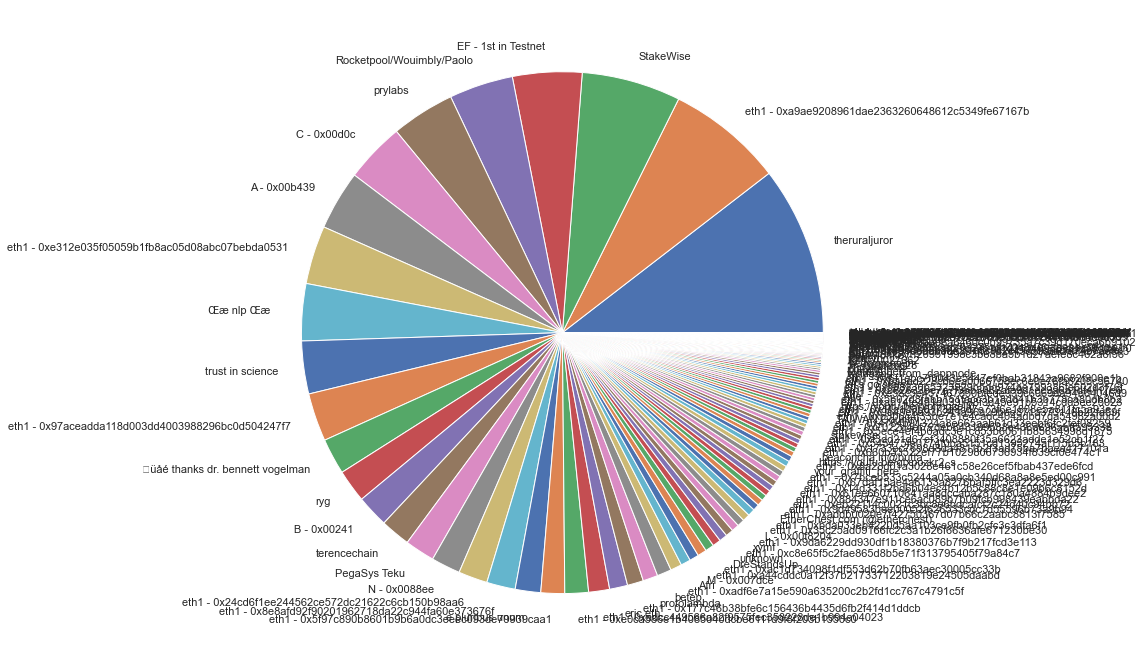

In [140]:
df_grouped_validators2.groupby('identifier')['validatorindex'].nunique().sort_values(ascending=False).plot(kind='pie', figsize=[12,12])
pl.ylabel('')


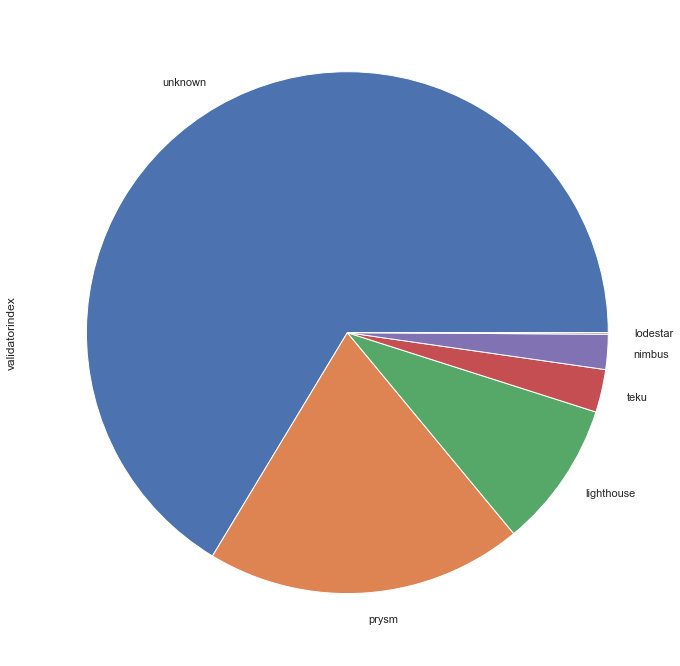

In [141]:
df_grouped_validators2.groupby('client_identifier')['validatorindex'].nunique().sort_values(ascending=False).plot(kind='pie', figsize=[12,12])

In [142]:
summary_identifier_stats = df_grouped_validators2.groupby('identifier')[['validatorindex', 'withdrawalcredentials_y', 'client_identifier', 'eth1_deposit_addr']].nunique().sort_values(by=['validatorindex'], ascending=False)

summary_identifier_stats['val_per_wkey'] = summary_identifier_stats['withdrawalcredentials_y']/summary_identifier_stats['validatorindex']
summary_identifier_stats['val_per_wkey'] = summary_identifier_stats['withdrawalcredentials_y']/summary_identifier_stats['validatorindex']


summary_identifier_stats.sort_values(by=['validatorindex'], ascending=False).head(20)



,validatorindex,withdrawalcredentials_y,client_identifier,eth1_deposit_addr,val_per_wkey
identifier,,,,,
theruraljuror,5782,5782,5,0,1.000000
eth1 - 0xa9ae9208961dae2363260648612c5349fe67167b,3979,3979,1,1,1.000000
StakeWise,3392,5,3,0,0.001474
EF - 1st in Testnet,2374,1,1,0,0.000421
Rocketpool/Wouimbly/Paolo,2193,1,2,0,0.000456
prylabs,2176,2176,1,0,1.000000
C - 0x00d0c,2049,2,3,0,0.000976
A - 0x00b439,2037,1,1,0,0.000491
eth1 - 0xe312e035f05059b1fb8ac05d08abc07bebda0531,2000,2000,1,1,1.000000


#### Takeaway - the real juror is a programmatic player - 1.0 val_per_wkey ratio aka they have a different withdrawal key

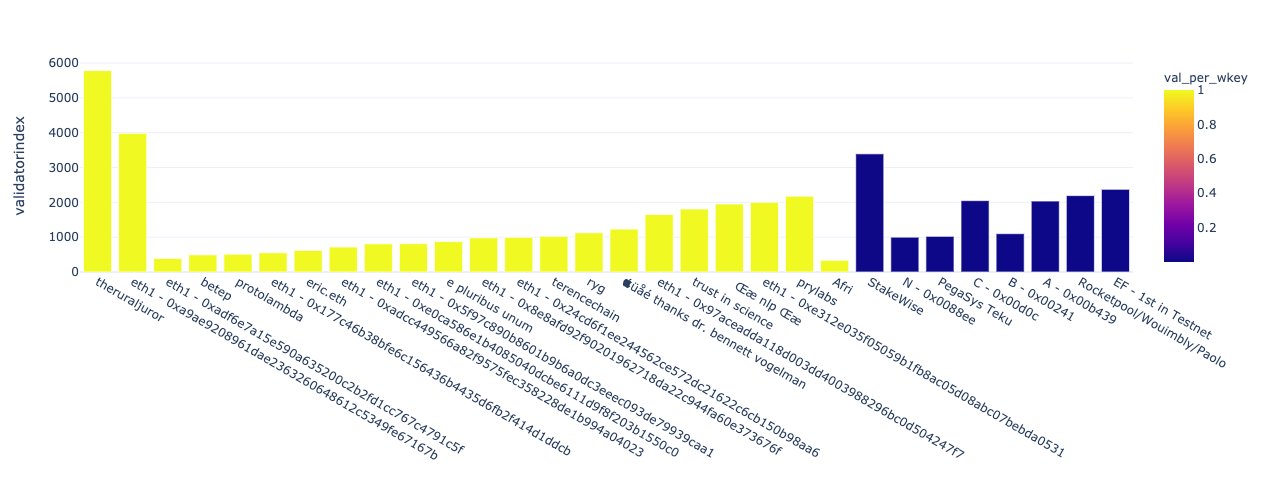

In [143]:

# fig = go.Figure()

# # Create list from 0 to 39 to use as x, y, and color
# values = top30_vals['val_per_wkey']

# fig.add_trace(go.Bar(
#     x=top30_vals.sort_values(by=['val_per_wkey'], ascending=False).index,
#     y=top30_vals.sort_values(by=['val_per_wkey'], ascending=False)['validatorindex'],
#     marker=dict(
# #         size=16,
#         cmax=0,
#         cmin=1,
#         color=top30_vals['val_per_wkey'],
#         colorbar=dict(
#             title="Colorbar"
#         ),
#         colorscale="Viridis"
#     )))

# fig.show()

top30_vals['identifier_hack'] = top30_vals.index

import plotly.express as px
data = px.data.gapminder()

# data_canada = data[data.country == 'Canada']
fig = px.bar(top30_vals.sort_values(by=['val_per_wkey'], ascending=False), x='identifier_hack', y='validatorindex',
             hover_data=['identifier_hack', 'validatorindex'], color='val_per_wkey',
             labels={'Number of validators':'validatorindex'}, height=500)

fig.update_layout(template="plotly_white", xaxis = dict(
      title = ""
    ))

fig.show()



# top30_vals = summary_identifier_stats.sort_values(by=['validatorindex'], ascending=False).head(30)

# top30_vals.sort_values(by=['val_per_wkey'], ascending=False).plot(y='validatorindex', kind='bar', figsize=[20,10])

In [162]:

grouped_by_client=df_grouped_validators2.groupby('client_identifier').nunique().head(20)

In [163]:
grouped_by_client.head()

,validatorindex,name,identifier,eth1_deposit_addr,with_key_match,activationeligibilityepoch,activationepoch,exitepoch,withdrawableepoch,balance,effectivebalance,lastattestationslot,pubkey,slashed,withdrawalcredentials_x,withdrawa_credentials_updated,withdrawalcredentials_y
client_identifier,,,,,,,,,,,,,,,,,
lighthouse,6265,50,27,0,0,38,326,4,4,1059,4,349,1059,1,855,855,6060
lodestar,66,13,5,0,0,4,9,1,1,19,2,2,19,0,19,19,66
nimbus,1497,22,14,0,0,14,99,20,20,1317,6,267,1317,1,287,287,466
prysm,13568,73,41,0,0,83,1672,40,33,5720,7,914,5721,1,4324,4324,12171
teku,1834,45,15,0,0,14,115,2,2,1376,4,223,1376,1,352,352,810
